<>:304: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:336: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:304: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:336: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?


1 8
9 4
5 0
2 6
7 3


/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50344/730675667.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_data_diff_co2 = pd.concat([df_data_diff_co2, pd.DataFrame([dict_value])], ignore_index=True)
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50344/730675667.py:211: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50344/730675667.py:304: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if idx_var is not 2 :
/var/folders/xh/2lcxyv6x2m5_m391j_17cn7w0000gn/T/ipykernel_50344/730675667.py:336: SyntaxWarni

[335.6022, 289.1148, 292.8186, 350.8062, 375.5082, 329.1594, 279.9006, 270.1452, 323.8728, 348.5526, 345.4128, 272.169, 282.2124, 339.5748, 355.4292, 14.1522, 7.334999999999999, 4.969200000000001, 5.7786, 5.9238, 57.2796, 40.59, 36.5838, 38.39279999999999, 36.9702] [376.8996, 301.2516, 293.4414, 371.7582, 428.4983999999999, 235.9764, 179.2674, 181.2222, 207.735, 216.6378, 30.4968, 19.7514, 14.4936, 14.6934, 14.7198, 142.809, 94.6626, 87.65039999999999, 97.5918, 95.72579999999999, 4.494, 2.4312, 2.5932, 3.063, 3.084]
results:  {'R2': 0.7251009738564829, 'pvalue': 6.765156323516748e-08, 'slope': 85.12269333333334, 'intercept': 335.123472}


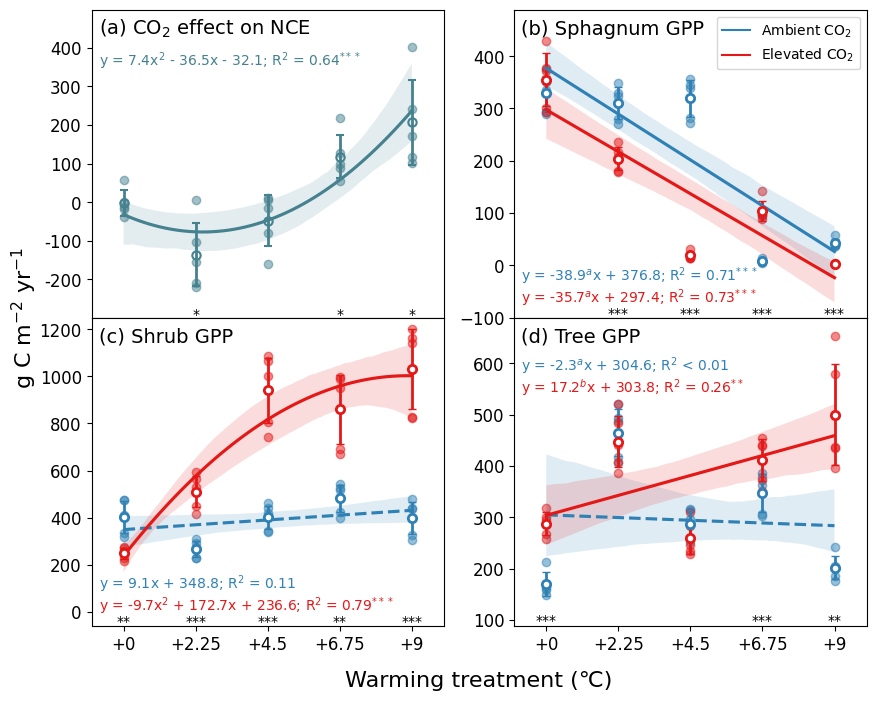

In [1]:
# figure-1,the results of carbon fluxes: NCE; GPP; NPP; Ra; Rh; CH4


# read data
import pandas as pd
import numpy as np

df_data_mlm  = pd.read_excel("/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/2_mod_results/results_MLM/1_2_1_data_MLM/2_df_res_mlm_yrDel_nomean.xlsx")
# choose column names 
var_names_in = ["plot",        'warming', 'year',
                "gpp_Tree",    "gpp_Shrub",    "gpp_Sphagnum", 
                "npp_Tree",    "npp_Shrub",    "npp_Sphagnum", 
                "ra_Tree",     "ra_Shrub",     "ra_Sphagnum",    
                "rh",          "nce", 
                "del_C_plant_Tree", "del_C_plant_Shrub", "del_C_plant_Sphagnum", 
                "del_C_litter",     "del_C_soil", "ch4"]

var_names = ["gpp_Tree",    "gpp_Shrub",    "gpp_Sphagnum", 
                "npp_Tree",    "npp_Shrub",    "npp_Sphagnum", 
                "ra_Tree",     "ra_Shrub",     "ra_Sphagnum",    
                "rh",          "ch4", "nce"]

df_data = df_data_mlm[var_names_in]
df_data = df_data[df_data["year"] > 2016]

file_path_co2   = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/2_mod_results/"
df_data_mlm_co2 = pd.read_excel(file_path_co2   + "results_MLM/1_2_1_data_MLM/2_df_res_mlm_yrDel_nomean.xlsx")
df_data_co2     = df_data_mlm_co2[var_names_in]
df_data_co2     = df_data_co2[df_data_co2["year"] > 2016]

df_data_diff_co2   = pd.DataFrame(columns=var_names_in)

# plot number for different treatments
i_warmPlots  = [1, 9, 5, 2, 7]
i_warmEleCO2 = [8, 4, 0, 6, 3]
color_acc    = "#45818E"

df_data = df_data_co2.copy()
for idx, (iwp, icp) in enumerate(zip(i_warmPlots, i_warmEleCO2)):
    print(iwp, icp)
    for year in df_data["year"].unique():
        dict_value = {}
        dict_value["plot"] = icp
        dict_value["year"] = year
        for ivar in var_names:
            diff = df_data.loc[(df_data['plot'] == icp) & (df_data['year'] == year), ivar].values[0] - df_data.loc[(df_data['plot'] == iwp) & (df_data['year'] == year), ivar].values[0]
            dict_value[ivar] = diff
            
        df_data_diff_co2 = pd.concat([df_data_diff_co2, pd.DataFrame([dict_value])], ignore_index=True)



data_acc        = df_data_diff_co2[df_data_diff_co2['plot'].isin([8, 4, 0, 6, 3])]


# -----------------------------------------------------------

import statsmodels.api as sm
import statsmodels.formula.api as smf

def cal_reg_diff(x1, y1, x2, y2): # justify if there is significant difference between two groups data
    # create two group datasets
    x = np.concatenate([x1, x2])
    y = np.concatenate([y1, y2])
    group = np.array([1]*len(x1) + [2]*len(x2))  # 1: group one; 2: group two

    # create a model include interactive object
    data = {'y': y, 'x': x, 'group': group}
    model = smf.ols('y ~ x + group + x * C(group)', data=data).fit()

    pvalue_diff_slope     = model.pvalues['x:C(group)[T.2]']
    pvalue_diff_intercept = model.pvalues['C(group)[T.2]']

    if pvalue_diff_slope < 0.05:
        res_ab_slope = ("a", "b")
    else:
        res_ab_slope = ("a", "a")

    if pvalue_diff_intercept < 0.05:
        res_ab_intercept = ("a", "b")
    else:
        res_ab_intercept = ("a", "a")

    return res_ab_slope, res_ab_intercept


def compare_linear_quadratic(x,y):
    # add constant
    X1 = sm.add_constant(x)  # linear
    X2 = sm.add_constant(np.column_stack((x, x**2)))  # quadratic

    # create model
    model_linear = sm.OLS(y, X1).fit()
    model_quadratic = sm.OLS(y, X2).fit()

    info_linear    = {"R2"       : model_linear.rsquared,
                      "pvalue"   : model_linear.f_pvalue, 
                      "slope"    : model_linear.params[1], 
                      "intercept": model_linear.params[0]} 
    info_quadratic = {"R2"       : model_quadratic.rsquared,
                      "pvalue"   : model_quadratic.f_pvalue, 
                      "x2"       : model_quadratic.params[-1], 
                      "x"        : model_quadratic.params[1],
                      "intercept": model_quadratic.params[0]}

    info_AIC_BIC = {
        "AIC_linear": model_linear.aic,
        "AIC_quadratic": model_quadratic.aic,
        "BIC_linear": model_linear.bic,
        "BIC_quadratic": model_quadratic.bic,
        "diff_AIC": model_linear.aic - model_quadratic.aic,
        "diff_BIC": model_linear.bic - model_quadratic.bic
    }

    return info_linear, info_quadratic, info_AIC_BIC

def check_pvalue(pvalue):
    if   pvalue < 0.001: 
        mark_p = "***"; line_style = "-"
    elif pvalue < 0.01: 
        mark_p = "**"; line_style = "-"
    elif pvalue < 0.05: 
        mark_p = "*"; line_style = "-"
    else: 
        mark_p = ""; line_style = "--"
    return mark_p, line_style


def check_negative(b, c=None):
    if c is None:
        if b < 0:
            ret_str = "y = {:.1f}$^{}$x - {:.1f}; R$^2$ = {:.2f}"
        else:
            ret_str = "y = {:.1f}$^{}$x + {:.1f}; R$^2$ = {:.2f}"
    else:
        if b < 0:
            if c < 0:
                ret_str = "y = {:.1f}x$^2$ - {:.1f}x - {:.1f}; R$^2$ = {:.2f}"
            else:
                ret_str = "y = {:.1f}x$^2$ - {:.1f}x + {:.1f}; R$^2$ = {:.2f}"
        else:
            if c < 0:
                ret_str = "y = {:.1f}x$^2$ + {:.1f}x - {:.1f}; R$^2$ = {:.2f}"
            else:
                ret_str = "y = {:.1f}x$^2$ + {:.1f}x + {:.1f}; R$^2$ = {:.2f}"
    return ret_str


# start to plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import mannwhitneyu

# import matplotlib as mpl
%matplotlib inline
# mpl.rcParams['text.usetex'] = False

def to_int(x, pos):
    return '{:.0f}'.format(x)


nrow = 2; ncol = 2

fig, axes = plt.subplots(nrow, ncol, figsize=(10,8)) 

ls_subtitle = [["(a)", "(b) Sphagnum GPP"],
               ["(c) Shrub GPP", "(d) Tree GPP"]]

# ls_ylim = [[(400, 1950), (-59,1250), (-719, 199)],
#            [(89,689), (-100,489), (-280, 80)]]

ls_ylim = [[(400, 1950), (-100,489), (-719, 199)],
           [(-59,1250),(89,689),  (-280, 80)]]

# ls_pos  = [[(0.02, 0.81, 0.74), (0.02, 0.1, 0.03), (0.02, 0.1, 0.03)],
#            [(0.02, 0.81, 0.74), (0.02, 0.1, 0.03), (0.15, 0.89, 0.82)]]

ls_pos  = [[(0.02, 0.81, 0.74), (0.02, 0.1, 0.03), (0.02, 0.1, 0.03)],
           [(0.02, 0.1, 0.03), (0.02, 0.81, 0.74),  (0.15, 0.89, 0.82)]]

x_bar = [0, 2.25, 4.5, 6.75, 9]
custom_x_ticks  = [0,      2.25,    4.5,    6.75,    9]  # x stick
custom_x_labels = ['+0', '+2.25', '+4.5', '+6.75', '+9']  # x-axis label

ls_plot = [8, 4, 0, 6, 3]

ls_warming = [0, 2.25, 4.5, 6.75, 9]

# plot CO2 effect on NCE
ax = axes[0,0]
ax.text(0.02, 0.92, "(a) CO$_2$ effect on NCE", fontsize=14, transform=ax.transAxes)#, ha='left', va='top')
ls_x = []
ls_y = []
for idx, iwarm in enumerate(ls_plot):
    plt_x = np.full(5, ls_warming[idx])
    plt_y = data_acc[data_acc["plot"]==iwarm]["nce"]
    t_stat, p_value = stats.ttest_1samp(plt_y, 0)
    # print("statistic: ", iwarm, "--", t_stat, p_value)
    # ax.scatter(plt_x, plt_y)
    ls_x.extend(plt_x)
    ls_y.extend(plt_y)
    ax.errorbar(ls_warming[idx], np.mean(plt_y), yerr=np.std(plt_y), fmt='o', ecolor=color_acc, capsize=3, mfc='none', mec=color_acc, mew=1.5, linewidth=2)
    if p_value < 0.001: mark_p_0 = "***"
    elif p_value < 0.01: mark_p_0 = "**"
    elif p_value < 0.05: mark_p_0 = "*"
    else: mark_p_0 =""
    ax.text(ls_warming[idx], -290, mark_p_0, ha="center", va="center", fontsize=10 )
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_int))
ax.set_xticks([0, 2.25, 4.5, 6.75, 9], [], fontsize=12)
# slope, intercept, r_value, p_value, std_err = linregress(ls_x, ls_y)
# print(" 1 order: ", r_value*r_value)
ax.set_xlim(-1, 10)

ax.scatter(ls_x,ls_y,alpha=0.5,color=color_acc,zorder=1)

slope, intercept, r_value, p_value, std_err = linregress(ls_x,ls_y)
if p_value < 0.001: mark_p = "***"; line_style = "-"
elif p_value < 0.01: mark_p = "**"; line_style = "-"
elif p_value < 0.05: mark_p = "*"; line_style = "-"
else: mark_p = ""; line_style = "--"

sns.regplot(x=ls_x, y=ls_y, order=2, ax=ax, scatter_kws={'alpha': 0.5, 'color':color_acc},line_kws={"linestyle": line_style}, scatter=False, color=color_acc) #, color="#2F81B5",  label="Ambient CO$_2$")
info_linear, info_quadratic, info_diff = compare_linear_quadratic(np.array(ls_x), np.array(ls_y))
ax.text(0.02, 0.8, 
        "y = {:.1f}x$^2$ - {:.1f}x - {:.1f}; R$^2$ = {:.2f}".format(info_quadratic["x2"],abs(info_quadratic["x"]),abs(info_quadratic["intercept"]),info_quadratic["R2"])+"$^{"+mark_p+"}$", 
        fontsize=10, transform=ax.transAxes, color=color_acc, va='bottom') 
ax.set_ylim(-299, 499)


ls_vars = ["nce", "gpp_sphagnum", "gpp_shrub", "gpp_tree"]
idx_var = -1
# ls_x_pos = [0, -42, 98, -92]
ls_x_pos = [0, -92, -42, 98]

for irow in range(nrow):
    for icol in range(ncol):
        ax = axes[irow, icol]
        idx_var += 1
        if irow == 0 and icol == 0: continue
        ivar = ls_vars[idx_var]
        # read data
        df_data_ivar = df_data[["plot", 'warming', 'year']]
        if ivar == "nce":
            df_data_ivar = df_data_ivar.assign(dat_ivar = df_data["gpp_Tree"] + df_data["gpp_Shrub"] + df_data["gpp_Sphagnum"])
        elif ivar == "gpp_shrub":
            df_data_ivar = df_data_ivar.assign(dat_ivar = df_data["gpp_Shrub"])
        elif ivar == "gpp_tree":
            df_data_ivar = df_data_ivar.assign(dat_ivar = df_data["gpp_Tree"])
        elif ivar == "gpp_sphagnum":
            df_data_ivar = df_data_ivar.assign(dat_ivar = df_data["gpp_Sphagnum"])

        
        # handle data
        x           = []
        y_aco2      = []
        y_eco2      = []
        y_mean_aco2 = []
        y_mean_eco2 = []
        y_std_aco2  = []
        y_std_eco2  = []
        
        for iwarm, ico2 in zip(i_warmPlots, i_warmEleCO2):
            x.extend(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"])
            ls_dat_aco2 =(df_data_ivar[df_data_ivar["plot"]==iwarm]["dat_ivar"]).to_numpy().flatten().tolist()
            y_aco2.extend(ls_dat_aco2)
            y_mean_aco2.append(np.nanmean(np.array(ls_dat_aco2)))
            y_std_aco2.append(np.nanstd(np.array(ls_dat_aco2)))
            # -----------------------------------------------------------------
            ls_dat_eco2 =(df_data_ivar[df_data_ivar["plot"]==ico2]["dat_ivar"]).to_numpy().flatten().tolist()
            y_eco2.extend(ls_dat_eco2)
            y_mean_eco2.append(np.nanmean(np.array(ls_dat_eco2)))
            y_std_eco2.append(np.nanstd(np.array(ls_dat_eco2)))

            # t_stat, p_value = stats.ttest_ind(ls_dat_aco2, ls_dat_eco2)
            t_stat, p_value = stats.ttest_rel(ls_dat_aco2, ls_dat_eco2)
            # print("t-test data: ", plt_y_aco2, plt_y_eco2)
            if p_value < 0.001: mark_p_0 = "***"
            elif p_value < 0.01: mark_p_0 = "**"
            elif p_value < 0.05: mark_p_0 = "*"
            else: mark_p_0 =""
            ax.text(df_data_ivar[df_data_ivar["plot"]==ico2]["warming"].to_numpy().flatten()[0], ls_x_pos[idx_var], mark_p_0, ha="center", va="center", fontsize=10)
            
        if irow == 0 and icol == 1: print(y_aco2, y_eco2)
        if irow == 0 and icol == 2: print(y_aco2, y_eco2)
        if irow == 1 and icol == 2: print(y_aco2, y_eco2)
        ax.scatter(x,y_aco2,alpha=0.5,color="#2F81B5",zorder=1)
        ax.scatter(x,y_eco2,alpha=0.5,color="#E51818",zorder=1)
        ax.errorbar(x_bar, y_mean_aco2, yerr=[np.array(y_std_aco2), np.array(y_std_aco2)], fmt='none', ecolor='#2F81B5', capsize=3, linewidth=2,zorder=2)
        ax.errorbar(x_bar, y_mean_eco2, yerr=[np.array(y_std_eco2), np.array(y_std_eco2)], fmt='none', ecolor='#E51818', capsize=3, linewidth=2,zorder=2)
        ax.scatter(x_bar, y_mean_aco2, marker='o', color='white', edgecolors='#2F81B5', linewidth=2, zorder=3)
        ax.scatter(x_bar, y_mean_eco2, marker='o', color='white', edgecolors='#E51818', linewidth=2, zorder=3)

        # linear and quadratic test
        info_linear_aco2, info_quadratic_aco2, info_diff_aco2 = compare_linear_quadratic(np.array(x), np.array(y_aco2))
        info_linear_eco2, info_quadratic_eco2, info_diff_eco2 = compare_linear_quadratic(np.array(x), np.array(y_eco2))

        if idx_var == 2: print("results: ", info_linear_eco2)

        # check if significant different
        if idx_var is not 2 :
            res_ab_slope, res_ab_intercept = cal_reg_diff(np.array(x), np.array(y_aco2), np.array(x), np.array(y_eco2))
        else:
            res_ab_slope, res_ab_intercept = ('\u200B', '\u200B'), ('\u200B', '\u200B')
        
        # linear or quadratic
        # if abs(info_diff_aco2["diff_AIC"]) < 4:
        info_aco2 = info_linear_aco2; order_aco2 = 1
        mark_p, line_style = check_pvalue(info_aco2["pvalue"])
        if idx_var == 3:
            ax.text(ls_pos[irow][icol][0], ls_pos[irow][icol][1], 
                    # "y$^{}$ = {:.1f}$^{}$x + {:.1f}; R$^2$ = {:.2f}".format(mark_p_y[0],info_aco2["slope"],res_ab_slope[0],info_aco2["intercept"],info_aco2["R2"])+"$^{"+mark_p+"}$", 
                    "y = {:.1f}$^{}$x + {:.1f}; R$^2$ < {:.2f}".format(info_aco2["slope"],res_ab_slope[0],abs(info_aco2["intercept"]),0.01)+"$^{"+mark_p+"}$",
                    fontsize=10, transform=ax.transAxes, color="#2F81B5", va='bottom')
        else:
            ax.text(ls_pos[irow][icol][0], ls_pos[irow][icol][1], 
                # "y$^{}$ = {:.1f}$^{}$x + {:.1f}; R$^2$ = {:.2f}".format(mark_p_y[0],info_aco2["slope"],res_ab_slope[0],info_aco2["intercept"],info_aco2["R2"])+"$^{"+mark_p+"}$", 
                check_negative(info_aco2["intercept"]).format(info_aco2["slope"],res_ab_slope[0],abs(info_aco2["intercept"]),info_aco2["R2"])+"$^{"+mark_p+"}$",
                fontsize=10, transform=ax.transAxes, color="#2F81B5", va='bottom')
        # else: 
        #     info_aco2 = info_quadratic_aco2; order_aco2 = 2
        #     mark_p, line_style = check_pvalue(info_aco2["pvalue"])
        #     ax.text(ls_pos[irow][icol][0], ls_pos[irow][icol][1], 
        #             # "y$^{}$ = {:.1f}x$^2$ + {:.1f}x + {:.1f}; R$^2$ = {:.2f}".format(mark_p_y[0],info_aco2["x2"],info_aco2["x"],info_aco2["intercept"], info_aco2["R2"])+"$^{"+mark_p+"}$", 
        #             check_negative(info_aco2["x"], info_aco2["intercept"]).format(info_aco2["x2"],abs(info_aco2["x"]),abs(info_aco2["intercept"]), info_aco2["R2"])+"$^{"+mark_p+"}$", 
        #             fontsize=9, transform=ax.transAxes, color="#2F81B5", va='bottom')

        
        sns.regplot(x=x, y=y_aco2, order=order_aco2,ax=ax, scatter_kws={'alpha': 0.7, 'color':"#00857B"},line_kws={"linestyle": line_style}, scatter=False, color="#2F81B5") #, color="#2F81B5",  label="Ambient CO$_2$")
        
        
        # print("eCO2 ---", ivar,"------abs--", abs(info_diff_eco2["diff_AIC"]))
        if idx_var is not 2:
            info_eco2 = info_linear_eco2; order_eco2 = 1
            mark_p, line_style = check_pvalue(info_eco2["pvalue"])
            ax.text(ls_pos[irow][icol][0], ls_pos[irow][icol][2], 
                    # "y$^{}$ = {:.1f}$^{}$x + {:.1f}; R$^2$ = {:.2f}".format(mark_p_y[1],info_eco2["slope"],res_ab_slope[1],info_eco2["intercept"],info_eco2["R2"])+"$^{"+mark_p+"}$", 
                    check_negative(info_eco2["intercept"]).format(info_eco2["slope"],res_ab_slope[1],abs(info_eco2["intercept"]),info_eco2["R2"])+"$^{"+mark_p+"}$", 
                    fontsize=10, transform=ax.transAxes, color="#E51818", va='bottom')
            
        else: 
            info_eco2 = info_quadratic_eco2; order_eco2 = 2
            mark_p, line_style = check_pvalue(info_eco2["pvalue"])
            ax.text(ls_pos[irow][icol][0], ls_pos[irow][icol][2], 
                    # "y$^{}$ = {:.1f}x$^2$ + {:.1f}x + {:.1f}; R$^2$ = {:.2f}".format(mark_p_y[1],info_eco2["x2"],info_eco2["x"],info_eco2["intercept"], info_eco2["R2"])+"$^{"+mark_p+"}$", 
                    check_negative(info_eco2["x"],info_eco2["intercept"]).format(info_eco2["x2"],abs(info_eco2["x"]),abs(info_eco2["intercept"]), info_eco2["R2"])+"$^{"+mark_p+"}$", 
                    fontsize=10, transform=ax.transAxes, color="#E51818", va='bottom')

            # ax.text(ls_pos[irow][icol][0], ls_pos[irow][icol][2], "y = {:.1f}x$^2$ + {:.1f}x - {:.1f}; R$^2$ = {:.2f}".format(coefficients[-1],coefficients[1],-coefficients[0],r_squared)+"$^{"+mark_p+"}$", fontsize=10, transform=ax.transAxes, color="#2F81B5", va='bottom')

        if info_eco2["pvalue"] < 0.001: mark_p = "***"; line_style = "-"
        elif info_eco2["pvalue"] < 0.01: mark_p = "**"; line_style = "-"
        elif info_eco2["pvalue"] < 0.05: mark_p = "*"; line_style = "-"
        else: mark_p = ""; line_style = "--"
        sns.regplot(x=x, y=y_eco2, order=order_eco2,ax=ax, scatter_kws={'alpha': 0.7, 'color':"#00857B"},line_kws={"linestyle": line_style},scatter=False, color="#E51818")

        ax.set_xticks(custom_x_ticks, custom_x_labels, fontsize=12)
        ax.tick_params(axis='x', labelsize=12)  # x-axis ticks font size
        ax.tick_params(axis='y', labelsize=12)  # y-axis ticks font size

        ax.text(0.02, 0.92, ls_subtitle[irow][icol], fontsize=14, transform=ax.transAxes)
        ax.set_xlim(-1, 10)
        ax.set_ylim(ls_ylim[irow][icol][0], ls_ylim[irow][icol][1])
        
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='#2F81B5', linestyle = "-", label='Ambient CO$_2$')
green_line = mlines.Line2D([], [], color='#E51818', linestyle = "-", label='Elevated CO$_2$')

# legend
axes[0,1].legend( loc='upper right', handles=[blue_line, green_line])

axes[0,0].text(-0.19, 0, "g C m$^{-2}$ yr$^{-1}$", ha='center', va='center',rotation='vertical',transform=axes[0,0].transAxes, fontsize=16)

ax.set_xticks(custom_x_ticks, custom_x_labels, fontsize=12)
axes[1,1].text(-0.1, -0.18, "Warming treatment (℃)", fontsize=16, ha='center', va='center', transform=axes[1,1].transAxes)

plt.subplots_adjust(hspace=0, wspace=0.2)